In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%pylab inline
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('Critical_KMONs/2017-1-11-17-18-23_DET7AKMON_PodA_CHA_KMON_Step0_spectra_A.csv')
data

,Name,Run Time,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
0,A,2.0,753,742,733,724,714,709,705,704,...,869,824,901,1280,1552,1414,952,872,1080,1081
1,A,4.0,957,926,898,870,846,829,816,806,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
2,A,6.0,1065,1024,985,945,912,887,872,858,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
3,A,8.0,1066,1022,984,947,914,886,873,861,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
4,A,10.0,1068,1025,985,947,913,889,868,857,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671
5,A,12.0,1071,1027,985,942,912,889,872,861,...,1191,1093,1258,2128,2749,2431,1382,1197,1666,1656
6,A,14.0,1071,1026,984,947,912,888,872,861,...,1188,1090,1259,2113,2720,2407,1378,1194,1656,1646
7,A,16.0,1068,1027,986,947,913,889,870,857,...,1180,1090,1253,2094,2701,2396,1376,1194,1652,1641
8,A,18.0,1075,1030,984,944,919,889,876,863,...,1182,1084,1247,2085,2688,2384,1368,1187,1640,1633
9,A,20.0,1076,1032,989,949,912,888,873,861,...,1179,1088,1251,2080,2673,2368,1362,1189,1638,1627


In [4]:
data.shape

(362, 1203)

In [7]:
data_df = data.rename(columns ={'Run Time':'Time'}, inplace = True)
data_df = data.drop('Name', 1)
data_df.set_index('Time', inplace = True)
data_df.columns.name = 'Wavelength'

data_df.head()

Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,753,742,733,724,714,709,705,704,702,698,...,869,824,901,1280,1552,1414,952,872,1080,1081
4.0,957,926,898,870,846,829,816,806,801,794,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
6.0,1065,1024,985,945,912,887,872,858,848,841,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
8.0,1066,1022,984,947,914,886,873,861,852,843,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
10.0,1068,1025,985,947,913,889,868,857,850,842,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671


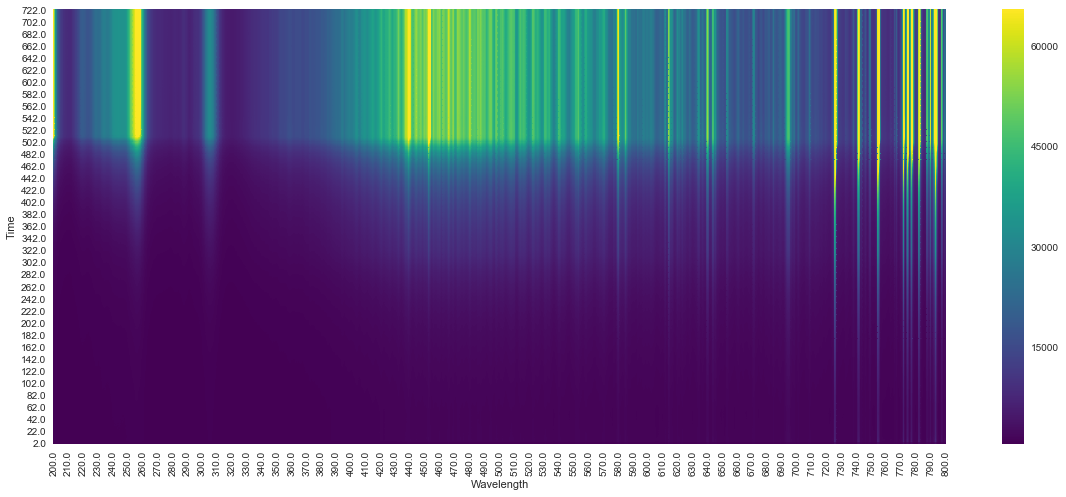

In [8]:
#create seaborn heatmap of data
sns.set_context(rc={"figure.figsize": (20,8)})                                   #increase figure size
ax = sns.heatmap(data_df, xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                #invert Y axis 


### Not a great resolution in the heatmap.  Range of intensity scales from hundreds to >60k.  Let's do a log rescale to see  if the data looks better.


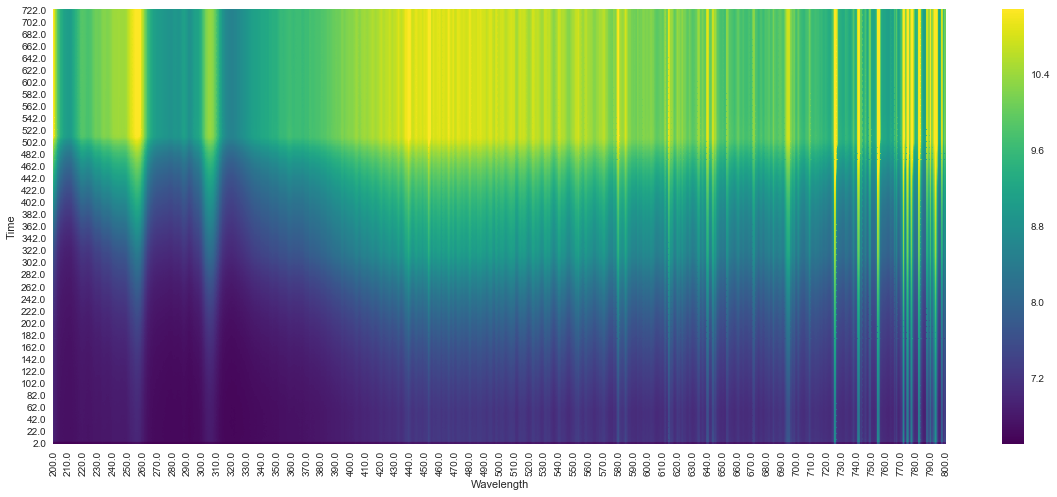

In [9]:
#log scale of data for our heatmap  

ax = sns.heatmap(log(data_df), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                   #invert Y axis 

Log scale is much better.
Total time is 722s
EP time near 510s is evident, remainder of time is what is known as overetch.  This portion determines the etched feature profile and final CD.


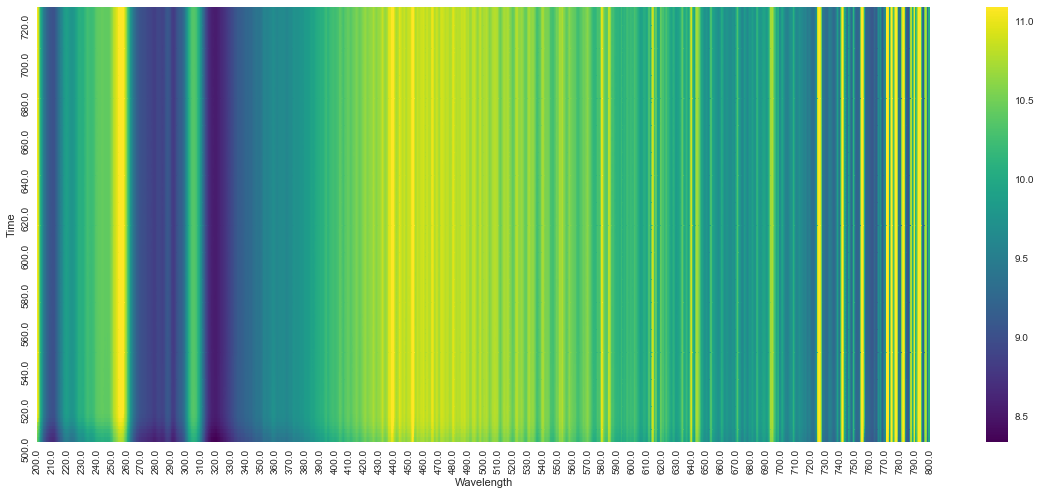

In [10]:
# let's zoom in on the overetch portion >500s.  this shows a bit more detail in the latter third of processing.

df_gt500 = data_df.ix[500:]                                                         #slice from 500s to last row
ax = sns.heatmap(log(df_gt500), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                   #invert Y axis 

In [36]:
'''
need to scroll through my training data and open the csv files into a df.  will store this is a dict of key:value pairs
key = string filename that includes the IMOxxxxxx identifier which will be used to match to 'Error' value 
value = dataframe made up of the csv file data 
'''
import glob
import pprint

dataLists = {}                                                      #initialize our dict to be filled w df's from csv files

for datafile in glob.glob("Critical_KMONs/*DET*spectra_A_IMO*"):    #use glob to aggregate files/folders into our dict
    '''perform the column indexing and transposing to get each df in correct format.'''
    df = pd.read_csv(datafile)  
    df.rename(columns ={'Run Time':'Time'}, inplace = True)
    df = df.drop('Name', 1)
    df.set_index('Time', inplace = True)
    df.columns.name = 'Wavelength'
    
    dataLists[datafile] = df                                        #populate dict values with each csv file of interest
    
    print('datafiles loaded:',datafile)
    #pprint.pprint (glob.glob("Critical_KMONs/*spectra_A*"))        #checking files pulled for debug

#dataLists                                                          #check it if needed for debug
print('Last file opened:',datafile)                                                     #print last filename opened
df.head()                                                           #show the last dataframe loaded into dict

datafiles loaded: Critical_KMONs\2017-1-11-17-18-23_DET7AKMON_PodA_CHA_KMON_Step0_spectra_A_IMO308056.csv
datafiles loaded: Critical_KMONs\2017-1-11-23-36-27_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO306885.csv
datafiles loaded: Critical_KMONs\2017-1-13-20-31-55_DET7AEP01_PodB_CHA_KMON_Step0_spectra_A_IMO308058.csv
datafiles loaded: Critical_KMONs\2017-1-13-22-32-14_DET7AEP01_PodA_CHA_KMON_Step0_spectra_A_IMO307365.csv
datafiles loaded: Critical_KMONs\2017-1-27-8-35-23_DET7AEP02_PodB_CHA_KMON_Step0_spectra_A_IMO308055A.csv
Last file opened: Critical_KMONs\2017-1-27-8-35-23_DET7AEP02_PodB_CHA_KMON_Step0_spectra_A_IMO308055A.csv


Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,753,744,734,724,714,707,702,700,699,697,...,847,807,871,1192,1425,1311,921,845,1026,1026
4.0,970,939,907,876,852,835,820,811,804,797,...,1203,1091,1265,2179,2853,2528,1402,1201,1710,1707
6.0,1070,1026,984,946,912,891,872,860,848,837,...,1216,1110,1279,2174,2830,2510,1414,1214,1711,1708
8.0,1073,1025,983,949,914,889,869,859,851,841,...,1202,1105,1267,2139,2783,2472,1397,1206,1689,1686
10.0,1073,1028,987,947,912,888,873,858,847,840,...,1200,1100,1259,2117,2748,2441,1389,1205,1674,1669


In [65]:
'''debug cell - confirm a selected dict value for correctness'''

d = dict((k, v) for k, v in dataLists.items() if '307365' in k)
for i in d:
    dfcheck = d[i]
dfcheck.head()


Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,754,742,735,726,716,709,707,706,703,700,...,873,829,902,1283,1561,1426,964,876,1086,1086
4.0,959,928,899,870,846,832,818,809,804,799,...,1234,1118,1310,2307,3033,2673,1456,1249,1800,1792
6.0,1073,1029,988,951,920,893,878,864,853,845,...,1237,1125,1311,2275,2973,2628,1459,1248,1771,1767
8.0,1073,1030,986,945,911,888,872,862,852,843,...,1220,1115,1296,2229,2905,2569,1436,1236,1743,1734
10.0,1074,1030,986,949,916,892,874,860,851,842,...,1215,1112,1290,2193,2861,2540,1424,1226,1723,1716


### The above sequence of code has loaded all of the datasets into a dictionary of dataframes that each represents a run of data that will be labeled according to the corresponding Error for that lot.

In [74]:
'''#pull in the files containing Error data which will be used to define anomylous vs. non-anom '''

raw_Errors = pd.read_csv('7AToy_Shared_WorkingFile.csv')
raw_Errors.head()

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
0,7A,1,307311,3514,NaN,250,17,6.0,2.0,1,1,1,0,0,NaN,NaN
1,7A,2,302809,3524,NaN,800,30,1.5,10.0,0,1,1,1,1,NaN,NaN
2,7A,3,307366,3514,NaN,250,17,6.0,2.0,1,1,1,0,0,NaN,NaN
3,7A,4,306917,3524,NaN,800,30,1.5,10.0,0,1,1,1,1,NaN,NaN
4,7A,5,307141,3514,NaN,250,17,6.0,2.0,1,1,1,0,0,NaN,NaN


In [79]:
raw_Errors.Error.dropna().describe()

count    144.000000
mean       0.177785
std        0.730176
min       -3.522000
25%       -0.284500
50%        0.185500
75%        0.638500
max        2.005000
Name: Error, dtype: float64

### 'raw_Errors' dataframe has a target column called 'Error' which is being used to demark which points are defined as anomylous vs non-anom.  The absolute value of distance to zero is the metric I will used here.  I will use a 2sigma cutoff to assign 

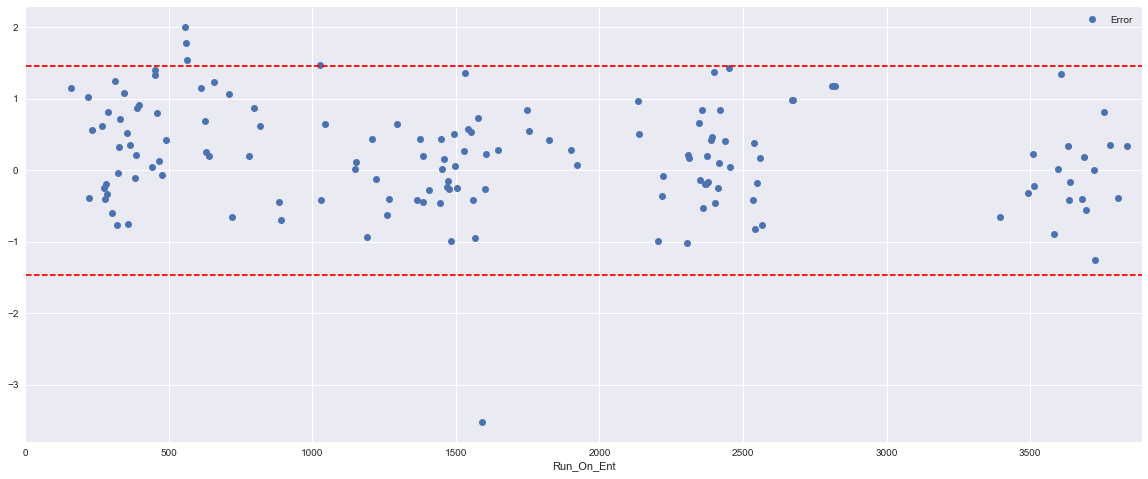

In [75]:
'''scatterplot with 2s cutoff lines shown'''

cutoff = 2 * raw_Errors.Error.std()
raw_Errors.plot(x = 'Run_On_Ent', y = 'Error', style = 'o')
plt.axhline(y=-cutoff, c = 'r', linestyle = '--')
plt.axhline(y=cutoff, c = 'r', linestyle = '--')

In [76]:
'''
Cell creates a new dataframe with the data pts labeled as anomylous = 1, non-anom = 0
'''
raw_Errors2 = raw_Errors.set_index('Run_On_Ent').dropna()                  #reset index to run order
clas_Errors = raw_Errors2[['Entity','Lot','Error']].copy()                 #copy columns needed for analysis to new df
clas_Errors["Label"] = np.where(abs(clas_Errors['Error']) > cutoff, 1, 0)  #classify pt as anom or non-anom
clas_Errors.loc[clas_Errors['Label'] == 1]                                 #show anomylous rows ('Label' = 1)

,Entity,Lot,Error,Label
Run_On_Ent,,,,
556,7A,308055A,2.005,1
560,7A,308501,1.782,1
563,7A,306641A,1.537,1
1028,7A,310357,1.465,1
1591,7A,310369,-3.522,1


### we can see there will be 5 anomalous pts in our training set

In [150]:
'''Use regex to extract the dict dataLists 'Lot' id keys to find the matching Label from the classified Errors dataframe'''

import re
#Critical_KMONs\2017-1-13-20-31-55_DET7AEP01_PodB_CHA_KMON_Step0_spectra_A_IMO308058.csv

for k in dataLists:
    id = re.findall('(?<=IMO)[A-Z0-9]+', k)[0]  #find the first Lot number match and store string in 'id'
    print(id)
    for row in clas_Errors.itertuples():
        if id == row.Lot: print ('matching label=',row.Label)
            


308056
matching label= 0
306885
matching label= 0
308058
matching label= 0
307365
matching label= 0
308055A
matching label= 1
